# Introduction




# Prepare for analysis

## Load packages

In [1]:
import pandas as pd
import numpy as np
import sys
import os
import random
from pathlib import Path
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

## Read the data

In [2]:
train_df = pd.read_csv("/kaggle/input/titanic/train.csv")
test_df = pd.read_csv("/kaggle/input/titanic/test.csv")

# Preliminary data inspection

## Quick glimpse of the data

In [3]:
train_df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [4]:
test_df.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [7]:
train_df.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [8]:
test_df.describe()

PassengerId      Pclass         Age       SibSp       Parch        Fare
count   418.000000  418.000000  332.000000  418.000000  418.000000  417.000000
mean   1100.500000    2.265550   30.272590    0.447368    0.392344   35.627188
std     120.810458    0.841838   14.181209    0.896760    0.981429   55.907576
min     892.000000    1.000000    0.170000    0.000000    0.000000    0.000000
25%     996.250000    1.000000   21.000000    0.000000    0.000000    7.895800
50%    1100.500000    3.000000   27.000000    0.000000    0.000000   14.454200
75%    1204.750000    3.000000   39.000000    1.000000    0.000000   31.500000
max    1309.000000    3.000000   76.000000    8.000000    9.000000  512.329200

## Few statistics on the data

### Missing data

In [9]:
def missing_data(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
    tt['Types'] = types
    return(np.transpose(tt))

In [10]:
missing_data(train_df)

PassengerId Survived Pclass    Name     Sex       Age  SibSp  Parch  \
Total             0        0      0       0       0       177      0      0   
Percent         0.0      0.0    0.0     0.0     0.0  19.86532    0.0    0.0   
Types         int64    int64  int64  object  object   float64  int64  int64   

         Ticket     Fare      Cabin  Embarked  
Total         0        0        687         2  
Percent     0.0      0.0  77.104377  0.224467  
Types    object  float64     object    object

In [11]:
missing_data(test_df)

PassengerId Pclass    Name     Sex        Age  SibSp  Parch  Ticket  \
Total             0      0       0       0         86      0      0       0   
Percent         0.0    0.0     0.0     0.0  20.574163    0.0    0.0     0.0   
Types         int64  int64  object  object    float64  int64  int64  object   

             Fare      Cabin Embarked  
Total           1        327        0  
Percent  0.239234  78.229665      0.0  
Types     float64     object   object

### Most frequent data

In [12]:
def most_frequent_values(data):
    total = data.count()
    tt = pd.DataFrame(total)
    tt.columns = ['Total']
    items = []
    vals = []
    for col in data.columns:
        try:
            itm = data[col].value_counts().index[0]
            val = data[col].value_counts().values[0]
            items.append(itm)
            vals.append(val)
        except Exception as ex:
            print(ex)
            items.append(0)
            vals.append(0)
            continue
    tt['Most frequent item'] = items
    tt['Frequence'] = vals
    tt['Percent from total'] = np.round(vals / total * 100, 3)
    return(np.transpose(tt))

In [13]:
most_frequent_values(train_df)

PassengerId Survived  Pclass                     Name  \
Total                      891      891     891                      891   
Most frequent item           1        0       3  Braund, Mr. Owen Harris   
Frequence                    1      549     491                        1   
Percent from total       0.112   61.616  55.107                    0.112   

                       Sex    Age   SibSp   Parch  Ticket   Fare    Cabin  \
Total                  891    714     891     891     891    891      204   
Most frequent item    male   24.0       0       0  347082   8.05  B96 B98   
Frequence              577     30     608     678       7     43        4   
Percent from total  64.759  4.202  68.238  76.094   0.786  4.826    1.961   

                   Embarked  
Total                   889  
Most frequent item        S  
Frequence               644  
Percent from total   72.441

In [14]:
most_frequent_values(test_df)

PassengerId  Pclass              Name     Sex   Age  \
Total                      418     418               418     418   332   
Most frequent item         892       3  Kelly, Mr. James    male  21.0   
Frequence                    1     218                 1     266    17   
Percent from total       0.239  52.153             0.239  63.636  5.12   

                     SibSp   Parch    Ticket   Fare            Cabin Embarked  
Total                  418     418       418    417               91      418  
Most frequent item       0       0  PC 17608   7.75  B57 B59 B63 B66        S  
Frequence              283     324         5     21                3      270  
Percent from total  67.703  77.512     1.196  5.036            3.297   64.593

### Unique values

In [15]:
def unique_values(data):
    total = data.count()
    tt = pd.DataFrame(total)
    tt.columns = ['Total']
    uniques = []
    for col in data.columns:
        unique = data[col].nunique()
        uniques.append(unique)
    tt['Uniques'] = uniques
    return(np.transpose(tt))

In [16]:
unique_values(train_df)

PassengerId  Survived  Pclass  Name  Sex  Age  SibSp  Parch  Ticket  \
Total            891       891     891   891  891  714    891    891     891   
Uniques          891         2       3   891    2   88      7      7     681   

         Fare  Cabin  Embarked  
Total     891    204       889  
Uniques   248    147         3

In [17]:
unique_values(test_df)

PassengerId  Pclass  Name  Sex  Age  SibSp  Parch  Ticket  Fare  \
Total            418     418   418  418  332    418    418     418   417   
Uniques          418       3   418    2   79      7      8     363   169   

         Cabin  Embarked  
Total       91       418  
Uniques     76         3

# Exploratory data analysis

## Univariate analysis for all features


We show here two graphs in paralel:
* distribution of class values, split per Survived value
* comparison of class values, in train and test data


Let's first aggregate train and test data into one single dataframe, `all_df`.

In [18]:
all_df = pd.concat([train_df, test_df], axis=0)
all_df["set"] = "train"
all_df.loc[all_df.Survived.isna(), "set"] = "test"

In [19]:
all_df.head()

PassengerId  Survived  Pclass  \
0            1       0.0       3   
1            2       1.0       1   
2            3       1.0       3   
3            4       1.0       1   
4            5       0.0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked    set  
0      0         A/5 21171   7.2500   NaN        S  train  
1      0          PC 17599  71.2833   C85        C  train  
2      0  STON/O2. 3101282   7.9250   NaN        S  train  
3      0            113803  53.1000  C123        S  train  
4      0            373450   8.0500   NaN        S  train

### Visual identity of our Notebook

We will use a unified set of colors for the graphs in our Notebook.  

For this Titanic Notebook, let's select a group of **marine** shades of blue.

We use as well a small function to visualize this color map.

In [20]:
def set_color_map(color_list):
    cmap_custom = ListedColormap(color_list)
    print("Notebook Color Schema:")
    sns.palplot(sns.color_palette(color_list))
    plt.show()
    return cmap_custom

Notebook Color Schema:


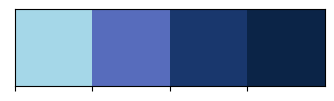

In [21]:
color_list = ["#A5D7E8", "#576CBC", "#19376D", "#0b2447"]
cmap_custom = set_color_map(color_list)

In [22]:
def plot_count_pairs(data_df, feature, title, hue="set"):
    f, ax = plt.subplots(1, 1, figsize=(8, 4))
    sns.countplot(x=feature, data=data_df, hue=hue, palette= color_list)
    plt.grid(color="black", linestyle="-.", linewidth=0.5, axis="y", which="major")
    ax.set_title(f"Number of passengers / {title}")
    plt.show()    

In [23]:
def plot_distribution_pairs(data_df, feature, title, hue="set"):
    f, ax = plt.subplots(1, 1, figsize=(8, 4))
    for i, h in enumerate(data_df[hue].unique()):
        g = sns.histplot(data_df.loc[data_df[hue]==h, feature], color=color_list[i], ax=ax, label=h)
    ax.set_title(f"Number of passengers / {title}")
    g.legend()
    plt.show()  

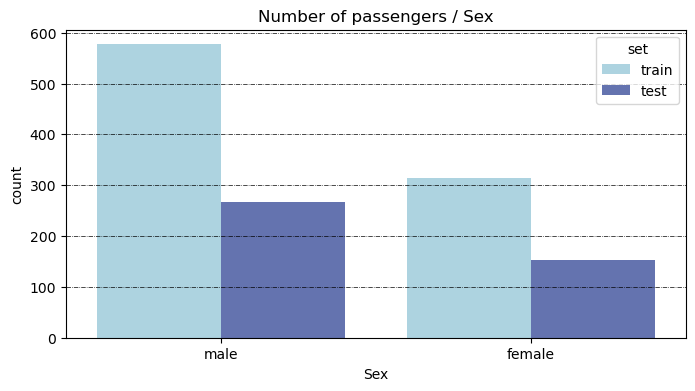

In [24]:
plot_count_pairs(all_df,  "Sex", "Sex")

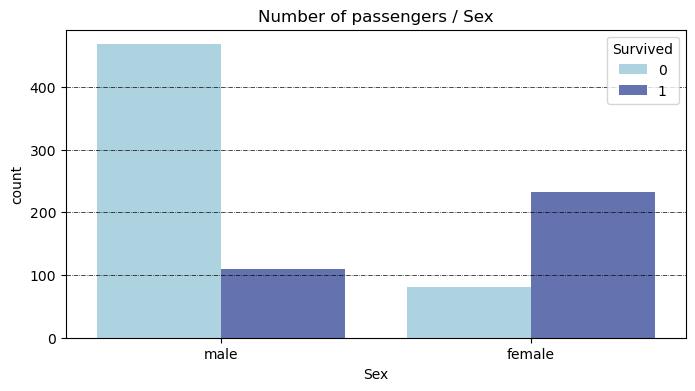

In [25]:
plot_count_pairs(train_df,  "Sex", "Sex", hue="Survived")

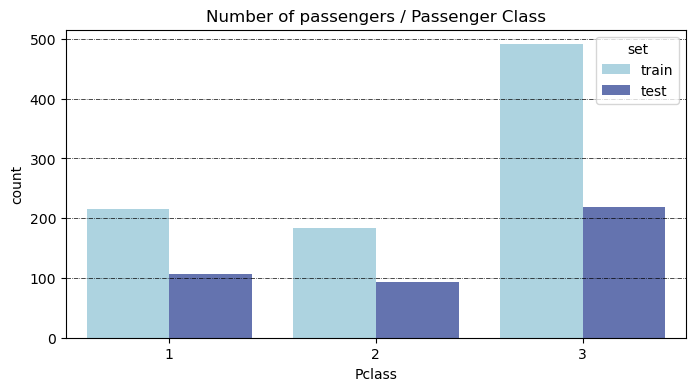

In [26]:
plot_count_pairs(all_df,  "Pclass", "Passenger Class")

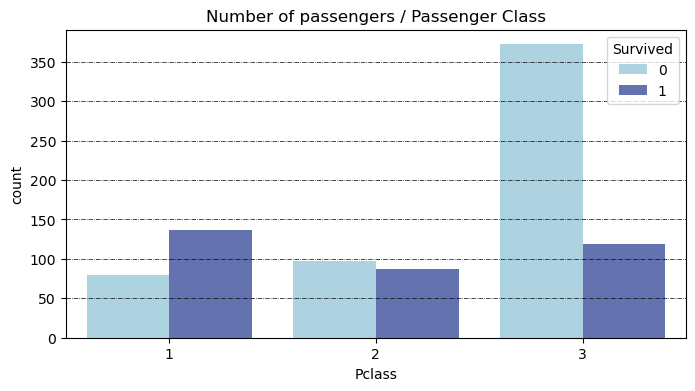

In [27]:
plot_count_pairs(train_df,  "Pclass", "Passenger Class", hue="Survived")

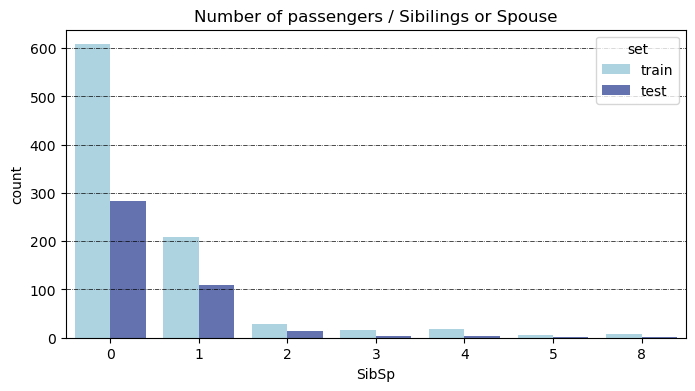

In [28]:
plot_count_pairs(all_df,  "SibSp", "Sibilings or Spouse")

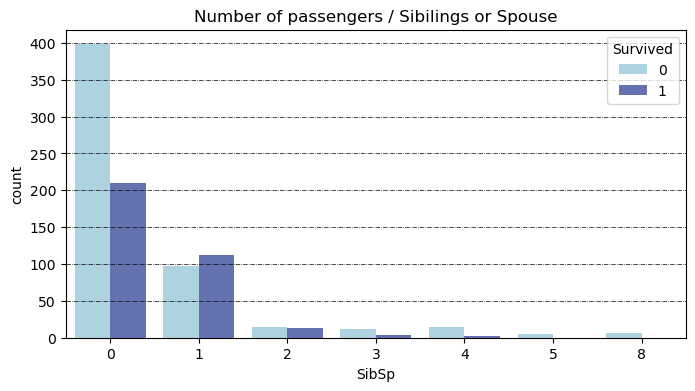

In [29]:
plot_count_pairs(train_df,  "SibSp", "Sibilings or Spouse", hue="Survived")

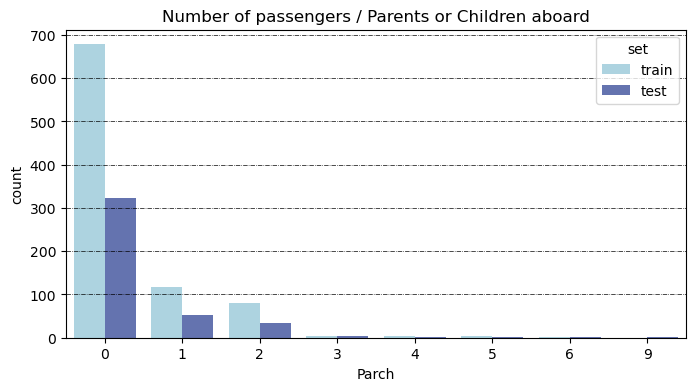

In [30]:
plot_count_pairs(all_df,  "Parch", "Parents or Children aboard")

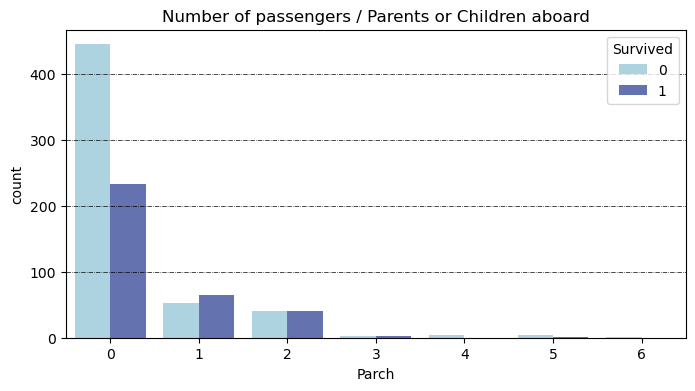

In [31]:
plot_count_pairs(train_df,  "Parch", "Parents or Children aboard", hue="Survived")

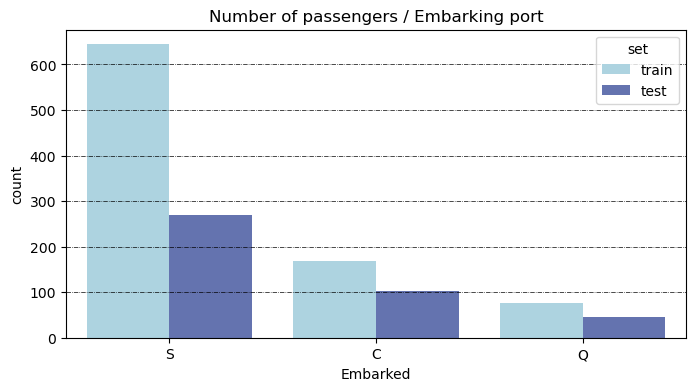

In [32]:
plot_count_pairs(all_df,  "Embarked", "Embarking port")

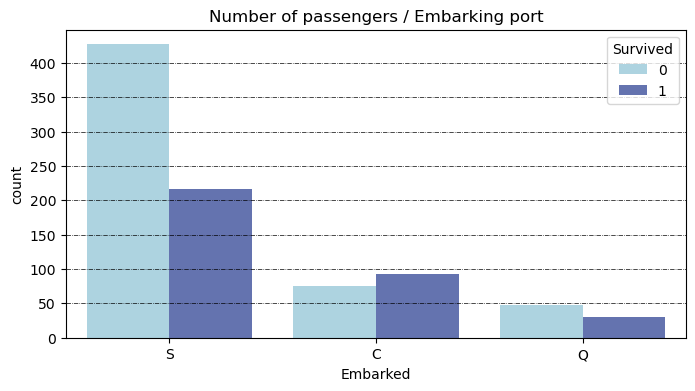

In [33]:
plot_count_pairs(train_df,  "Embarked", "Embarking port", hue="Survived")

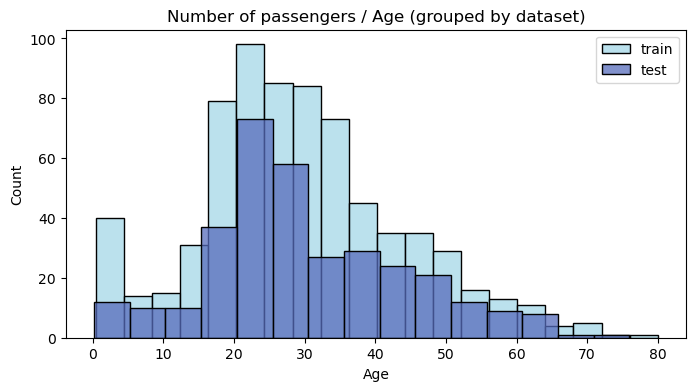

In [34]:
plot_distribution_pairs(all_df, "Age", "Age (grouped by dataset)")

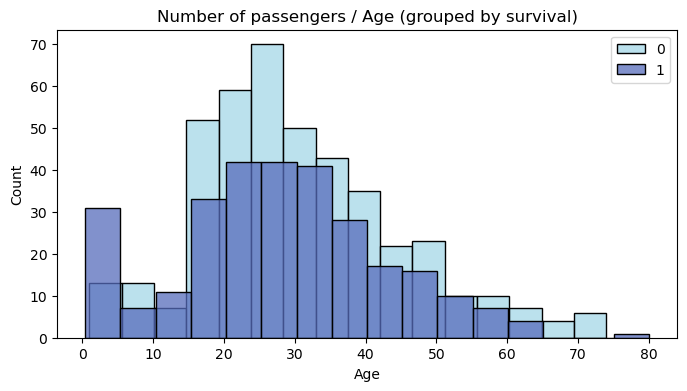

In [35]:
plot_distribution_pairs(train_df, "Age", "Age (grouped by survival)", hue="Survived")

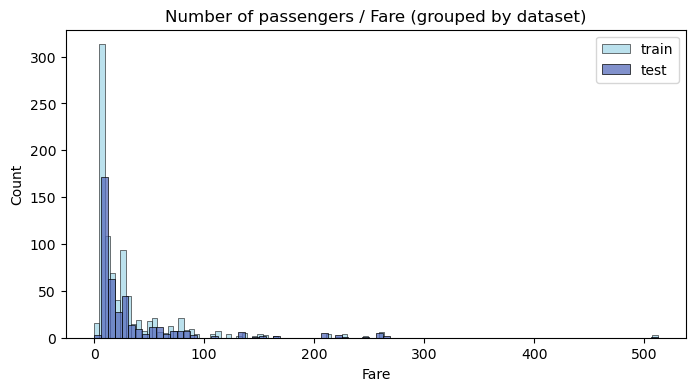

In [36]:
plot_distribution_pairs(all_df, "Fare", "Fare (grouped by dataset)")

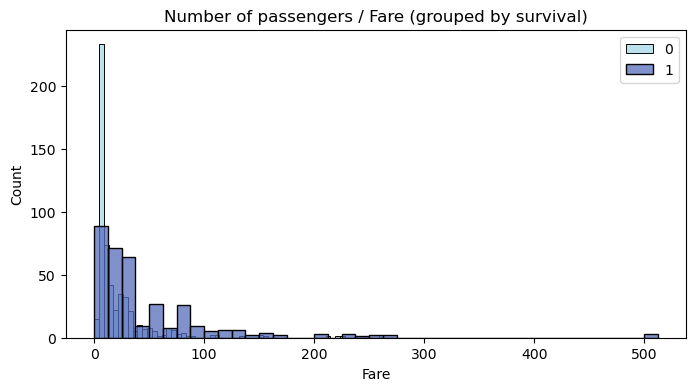

In [37]:
plot_distribution_pairs(train_df, "Fare", "Fare (grouped by survival)", hue="Survived")

## Family size


Based on SibSp (sibilings or spouse) and Parch (parents or children), we set the Family Size field.

In [38]:
all_df["Family Size"] = all_df["SibSp"] + all_df["Parch"] + 1

In [39]:
train_df["Family Size"] = train_df["SibSp"] + train_df["Parch"] + 1

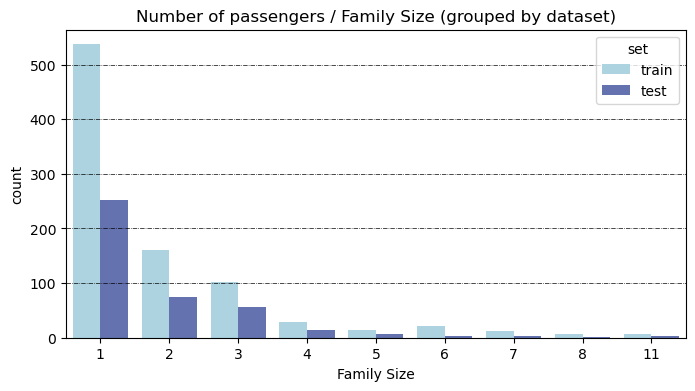

In [40]:
plot_count_pairs(all_df, "Family Size", "Family Size (grouped by dataset)")

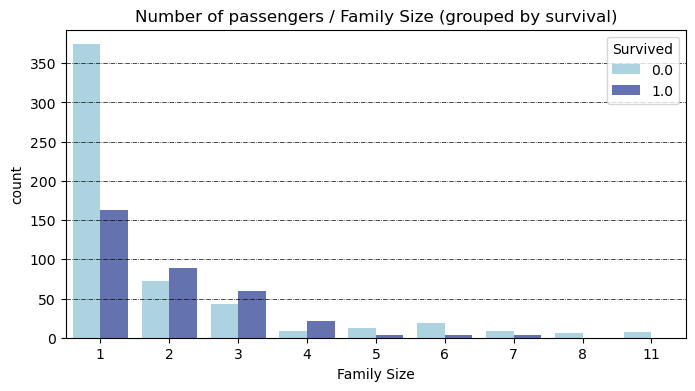

In [41]:
plot_count_pairs(all_df, "Family Size", "Family Size (grouped by survival)", hue="Survived")

## Age interval

In [42]:
all_df["Age Interval"] = 0.0
all_df.loc[ all_df['Age'] <= 16, 'Age Interval']  = 0
all_df.loc[(all_df['Age'] > 16) & (all_df['Age'] <= 32), 'Age Interval'] = 1
all_df.loc[(all_df['Age'] > 32) & (all_df['Age'] <= 48), 'Age Interval'] = 2
all_df.loc[(all_df['Age'] > 48) & (all_df['Age'] <= 64), 'Age Interval'] = 3
all_df.loc[ all_df['Age'] > 64, 'Age Interval'] = 4

In [43]:
train_df["Age Interval"] = 0.0
train_df.loc[train_df['Age'] <= 16, 'Age Interval']  = 0
train_df.loc[(train_df['Age'] > 16) & (train_df['Age'] <= 32), 'Age Interval'] = 1
train_df.loc[(train_df['Age'] > 32) & (train_df['Age'] <= 48), 'Age Interval'] = 2
train_df.loc[(train_df['Age'] > 48) & (train_df['Age'] <= 64), 'Age Interval'] = 3
train_df.loc[ train_df['Age'] > 64, 'Age Interval'] = 4

In [44]:
all_df.head()

PassengerId  Survived  Pclass  \
0            1       0.0       3   
1            2       1.0       1   
2            3       1.0       3   
3            4       1.0       1   
4            5       0.0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked    set  Family Size  \
0      0         A/5 21171   7.2500   NaN        S  train            2   
1      0          PC 17599  71.2833   C85        C  train            2   
2      0  STON/O2. 3101282   7.9250   NaN        S  train            1   
3      0            113803  53.1000  C123        S  train            2   
4      0            373450   8.0500   NaN        S  train            1   

   Age Interval  
0           1.0  
1           2.0  
2           1.0  
3           2.0  
4           2.0

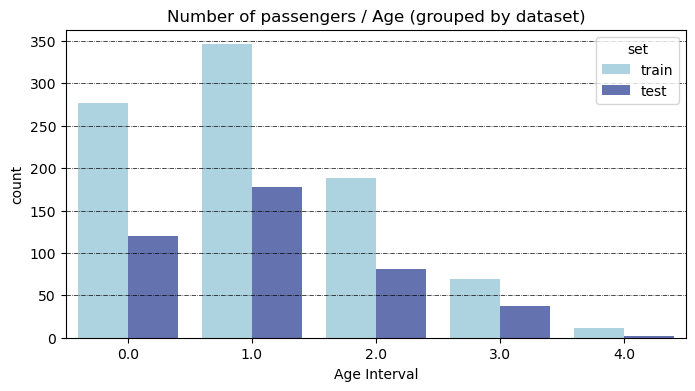

In [45]:
plot_count_pairs(all_df, "Age Interval", "Age (grouped by dataset)")

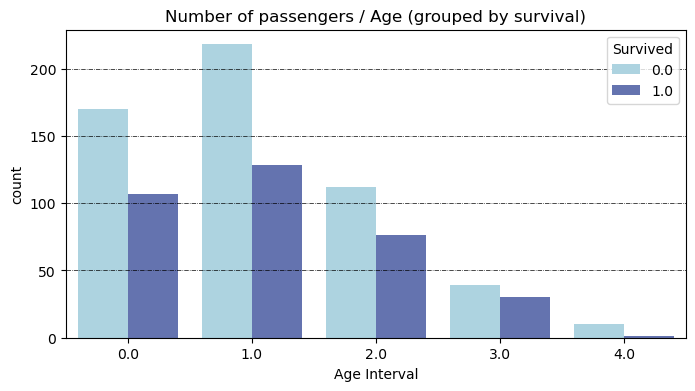

In [46]:
plot_count_pairs(all_df, "Age Interval", "Age (grouped by survival)", hue="Survived")

## Fare interval

In [47]:
all_df['Fare Interval'] = 0.0
all_df.loc[ all_df['Fare'] <= 7.91, 'Fare Interval'] = 0
all_df.loc[(all_df['Fare'] > 7.91) & (all_df['Fare'] <= 14.454), 'Fare Interval'] = 1
all_df.loc[(all_df['Fare'] > 14.454) & (all_df['Fare'] <= 31), 'Fare Interval']   = 2
all_df.loc[ all_df['Fare'] > 31, 'Fare Interval'] = 3

In [48]:
train_df['Fare Interval'] = 0.0
train_df.loc[ train_df['Fare'] <= 7.91, 'Fare Interval'] = 0
train_df.loc[(train_df['Fare'] > 7.91) & (train_df['Fare'] <= 14.454), 'Fare Interval'] = 1
train_df.loc[(train_df['Fare'] > 14.454) & (train_df['Fare'] <= 31), 'Fare Interval']   = 2
train_df.loc[ train_df['Fare'] > 31, 'Fare Interval'] = 3

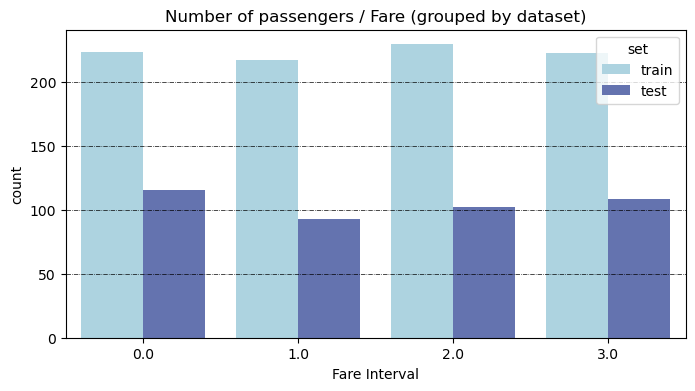

In [49]:
plot_count_pairs(all_df, "Fare Interval", "Fare (grouped by dataset)")

Let's create a composed feature: Pclass + Sex.

In [50]:
train_df["Sex_Pclass"] = train_df.apply(lambda row: row['Sex'][0].upper() + "_C" + str(row["Pclass"]), axis=1)

In [51]:
all_df["Sex_Pclass"] = all_df.apply(lambda row: row['Sex'][0].upper() + "_C" + str(row["Pclass"]), axis=1)

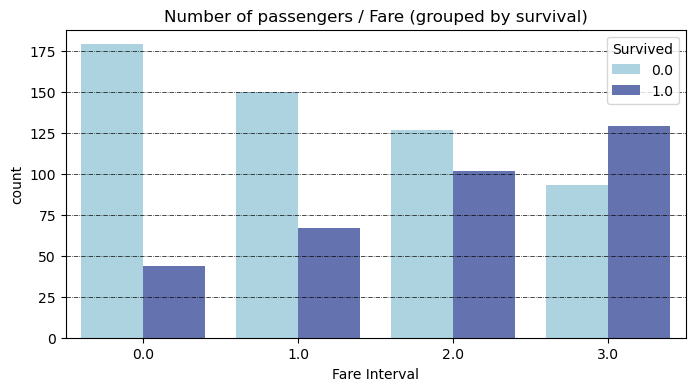

In [52]:
plot_count_pairs(all_df, "Fare Interval", "Fare (grouped by survival)", hue="Survived")

## Deck

Based on Cabin code, we extract the deck name

In [53]:
def get_deck(text):
    try:
        return text[0]
    except Exception as ex:
        return "Unknown"

In [54]:
all_df["Deck"] = all_df["Cabin"].apply(lambda x: get_deck(x))

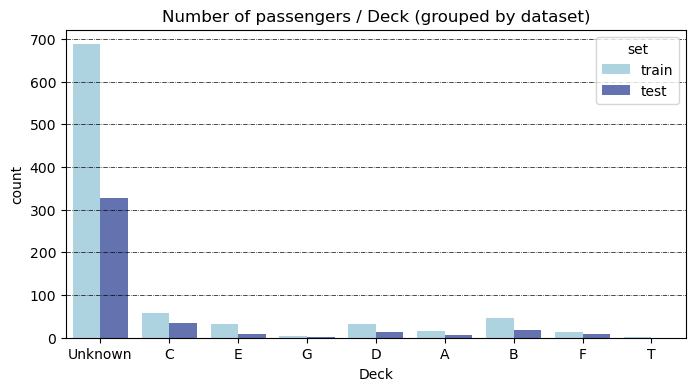

In [55]:
plot_count_pairs(all_df, "Deck", "Deck (grouped by dataset)")

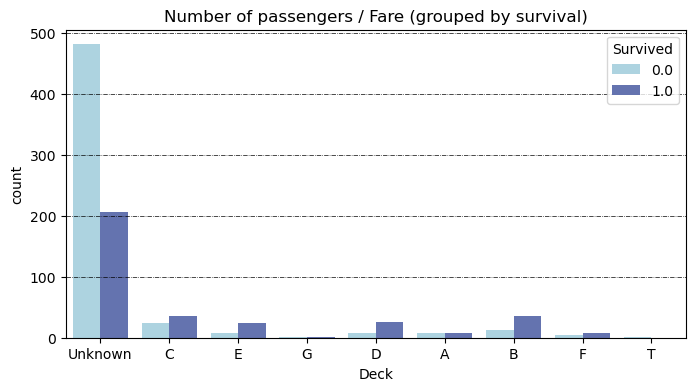

In [56]:
plot_count_pairs(all_df, "Deck", "Fare (grouped by survival)", hue="Survived")

In [57]:
np.transpose(pd.crosstab(all_df['Deck'], all_df['Pclass']))

Deck     A   B   C   D   E   F  G  T  Unknown
Pclass                                       
1       22  65  94  40  34   0  0  1       67
2        0   0   0   6   4  13  0  0      254
3        0   0   0   0   3   8  5  0      693

## Process names


When we process names, we would like to extract the following information:

- Family name - this is the first word (or few first words, if a family name with multiple names), followed by a comma  
- Title - this follows just after the comma   
- Given name - this is the word or group of words following family name  
- Maiden name - for ladies, is given between parantheses  

We start with creating a function that parses the Name string and extract (if possible) these 4 elements


In [58]:
def parse_names(row):
    try:
        text = row["Name"]
        split_text = text.split(",")
        family_name = split_text[0]
        next_text = split_text[1]
        split_text = next_text.split(".")
        title = (split_text[0] + ".").lstrip().rstrip()
        next_text = split_text[1]
        if "(" in next_text:
            split_text = next_text.split("(")
            given_name = split_text[0]
            maiden_name = split_text[1].rstrip(")")
            return pd.Series([family_name, title, given_name, maiden_name])
        else:
            given_name = next_text
            return pd.Series([family_name, title, given_name, None])
    except Exception as ex:
        print(f"Exception: {ex}")
    
    

In [59]:
all_df[["Family Name", "Title", "Given Name", "Maiden Name"]] = all_df.apply(lambda row: parse_names(row), axis=1)

In [60]:
train_df[["Family Name", "Title", "Given Name", "Maiden Name"]] = train_df.apply(lambda row: parse_names(row), axis=1)

## Deep dive into titles


Let's check few things about title:  
- relationship between Age Interval and Title;   
- relationship between Sex and Title;  
- relationship between SibSp, Parch, Family Size and Title;  


In [61]:
np.transpose(pd.crosstab(all_df['Title'], all_df['Age Interval']))

Title         Capt.  Col.  Don.  Dona.  Dr.  Jonkheer.  Lady.  Major.  \
Age Interval                                                            
0.0               0     0     0      0    1          0      0       0   
1.0               0     0     0      0    2          0      0       0   
2.0               0     1     1      1    1          1      1       1   
3.0               0     3     0      0    4          0      0       1   
4.0               1     0     0      0    0          0      0       0   

Title         Master.  Miss.  Mlle.  Mme.  Mr.  Mrs.  Ms.  Rev.  Sir.  \
Age Interval                                                            
0.0                61    111      0     0  193    30    1     0     0   
1.0                 0    113      2     1  334    68    1     3     0   
2.0                 0     29      0     0  163    67    0     2     0   
3.0                 0      7      0     0   56    31    0     3     1   
4.0                 0      0      0     0   11     1    0     0     0   

Title         the Countess.  
Age Interval                 
0.0                       0  
1.0                       0  
2.0                       1  
3.0                       0  
4.0                       0

In [62]:
np.transpose(pd.crosstab(all_df['Title'], all_df['Sex']))

Title   Capt.  Col.  Don.  Dona.  Dr.  Jonkheer.  Lady.  Major.  Master.  \
Sex                                                                        
female      0     0     0      1    1          0      1       0        0   
male        1     4     1      0    7          1      0       2       61   

Title   Miss.  Mlle.  Mme.  Mr.  Mrs.  Ms.  Rev.  Sir.  the Countess.  
Sex                                                                    
female    260      2     1    0   197    2     0     0              1  
male        0      0     0  757     0    0     8     1              0

In [63]:
np.transpose(pd.crosstab(all_df['Title'], all_df['SibSp']))

Title  Capt.  Col.  Don.  Dona.  Dr.  Jonkheer.  Lady.  Major.  Master.  \
SibSp                                                                     
0          0     3     1      1    5          1      0       2       13   
1          1     1     0      0    1          0      1       0       23   
2          0     0     0      0    2          0      0       0        2   
3          0     0     0      0    0          0      0       0        5   
4          0     0     0      0    0          0      0       0       13   
5          0     0     0      0    0          0      0       0        3   
8          0     0     0      0    0          0      0       0        2   

Title  Miss.  Mlle.  Mme.  Mr.  Mrs.  Ms.  Rev.  Sir.  the Countess.  
SibSp                                                                 
0        178      2     1  599    76    2     6     0              1  
1         45      0     0  130   114    0     2     1              0  
2         14      0     0   19     5    0     0     0              0  
3         10      0     0    3     2    0     0     0              0  
4          7      0     0    2     0    0     0     0              0  
5          2      0     0    1     0    0     0     0              0  
8          4      0     0    3     0    0     0     0              0

In [64]:
np.transpose(pd.crosstab(all_df['Title'], all_df['Parch']))

Title  Capt.  Col.  Don.  Dona.  Dr.  Jonkheer.  Lady.  Major.  Master.  \
Parch                                                                     
0          0     4     1      1    7          1      1       2        2   
1          1     0     0      0    1          0      0       0       34   
2          0     0     0      0    0          0      0       0       25   
3          0     0     0      0    0          0      0       0        0   
4          0     0     0      0    0          0      0       0        0   
5          0     0     0      0    0          0      0       0        0   
6          0     0     0      0    0          0      0       0        0   
9          0     0     0      0    0          0      0       0        0   

Title  Miss.  Mlle.  Mme.  Mr.  Mrs.  Ms.  Rev.  Sir.  the Countess.  
Parch                                                                 
0        174      2     1  686   110    2     6     1              1  
1         41      0     0   44    47    0     2     0              0  
2         45      0     0   19    24    0     0     0              0  
3          0      0     0    2     6    0     0     0              0  
4          0      0     0    2     4    0     0     0              0  
5          0      0     0    2     4    0     0     0              0  
6          0      0     0    1     1    0     0     0              0  
9          0      0     0    1     1    0     0     0              0

In [65]:
np.transpose(pd.crosstab(all_df['Title'], all_df['Family Size']))

Title        Capt.  Col.  Don.  Dona.  Dr.  Jonkheer.  Lady.  Major.  Master.  \
Family Size                                                                     
1                0     3     1      1    5          1      0       2        1   
2                0     1     0      0    0          0      1       0        5   
3                1     0     0      0    3          0      0       0       26   
4                0     0     0      0    0          0      0       0        5   
5                0     0     0      0    0          0      0       0        4   
6                0     0     0      0    0          0      0       0       10   
7                0     0     0      0    0          0      0       0        5   
8                0     0     0      0    0          0      0       0        3   
11               0     0     0      0    0          0      0       0        2   

Title        Miss.  Mlle.  Mme.  Mr.  Mrs.  Ms.  Rev.  Sir.  the Countess.  
Family Size                                                                 
1              150      2     1  579    36    2     5     0              1  
2               35      0     0  103    87    0     2     1              0  
3               32      0     0   49    47    0     1     0              0  
4               16      0     0    9    13    0     0     0              0  
5                9      0     0    4     5    0     0     0              0  
6                5      0     0    5     5    0     0     0              0  
7                7      0     0    2     2    0     0     0              0  
8                2      0     0    2     1    0     0     0              0  
11               4      0     0    4     1    0     0     0              0

In [66]:
np.transpose(pd.crosstab(all_df['Title'], all_df['Pclass']))

Title   Capt.  Col.  Don.  Dona.  Dr.  Jonkheer.  Lady.  Major.  Master.  \
Pclass                                                                     
1           1     4     1      1    6          1      1       2        5   
2           0     0     0      0    2          0      0       0       11   
3           0     0     0      0    0          0      0       0       45   

Title   Miss.  Mlle.  Mme.  Mr.  Mrs.  Ms.  Rev.  Sir.  the Countess.  
Pclass                                                                 
1          60      2     1  159    77    0     0     1              1  
2          50      0     0  150    55    1     8     0              0  
3         150      0     0  448    65    1     0     0              0

## Deep dive into families data

We would like to understand what happened with different families, we will follow their fate through the data.

Let's look first to few large families.

In [67]:
sel_columns = ["Name", "Sex","Age", "Title", "Family Name", "Given Name", "Maiden Name", "SibSp", "Parch", "Family Size", "Ticket", "Cabin", "Pclass", "Survived"]

In [68]:
all_df["Family Name"].value_counts()[0:5]

Andersson    11
Sage         11
Goodwin       8
Asplund       8
Davies        7
Name: Family Name, dtype: int64

In [69]:
all_df.loc[all_df["Family Name"]=="Andersson"][sel_columns].sort_values(by=["Family Size", "Ticket", "Age"], ascending=False)

Name     Sex   Age    Title  \
214             Andersson, Miss. Ida Augusta Margareta  female  38.0    Miss.   
13                         Andersson, Mr. Anders Johan    male  39.0      Mr.   
610  Andersson, Mrs. Anders Johan (Alfrida Konstant...  female  39.0     Mrs.   
542                  Andersson, Miss. Sigrid Elisabeth  female  11.0    Miss.   
541               Andersson, Miss. Ingeborg Constanzia  female   9.0    Miss.   
813                 Andersson, Miss. Ebba Iris Alfrida  female   6.0    Miss.   
850            Andersson, Master. Sigvard Harald Elias    male   4.0  Master.   
119                  Andersson, Miss. Ellis Anna Maria  female   2.0    Miss.   
68                     Andersson, Miss. Erna Alexandra  female  17.0    Miss.   
146       Andersson, Mr. August Edvard ("Wennerstrom")    male  27.0      Mr.   
320                        Andersson, Mr. Johan Samuel    male  26.0      Mr.   

    Family Name              Given Name                 Maiden Name  SibSp  \
214   Andersson   Ida Augusta Margareta                        None      4   
13    Andersson            Anders Johan                        None      1   
610   Andersson           Anders Johan   Alfrida Konstantia Brogren      1   
542   Andersson        Sigrid Elisabeth                        None      4   
541   Andersson     Ingeborg Constanzia                        None      4   
813   Andersson       Ebba Iris Alfrida                        None      4   
850   Andersson    Sigvard Harald Elias                        None      4   
119   Andersson        Ellis Anna Maria                        None      4   
68    Andersson          Erna Alexandra                        None      4   
146   Andersson          August Edvard                "Wennerstrom"      0   
320   Andersson            Johan Samuel                        None      0   

     Parch  Family Size   Ticket Cabin  Pclass  Survived  
214      2            7   347091   NaN       3       NaN  
13       5            7   347082   NaN       3       0.0  
610      5            7   347082   NaN       3       0.0  
542      2            7   347082   NaN       3       0.0  
541      2            7   347082   NaN       3       0.0  
813      2            7   347082   NaN       3       0.0  
850      2            7   347082   NaN       3       0.0  
119      2            7   347082   NaN       3       0.0  
68       2            7  3101281   NaN       3       1.0  
146      0            1   350043   NaN       3       1.0  
320      0            1   347075   NaN       3       NaN

In [70]:
all_df.loc[all_df["Family Name"]=="Sage"][sel_columns].sort_values(by=["Family Size", "Ticket", "Age"], ascending=False)

Name     Sex   Age    Title Family Name  \
360        Sage, Master. William Henry    male  14.5  Master.        Sage   
159         Sage, Master. Thomas Henry    male   NaN  Master.        Sage   
180       Sage, Miss. Constance Gladys  female   NaN    Miss.        Sage   
201                Sage, Mr. Frederick    male   NaN      Mr.        Sage   
324           Sage, Mr. George John Jr    male   NaN      Mr.        Sage   
792            Sage, Miss. Stella Anna  female   NaN    Miss.        Sage   
846           Sage, Mr. Douglas Bullen    male   NaN      Mr.        Sage   
863  Sage, Miss. Dorothy Edith "Dolly"  female   NaN    Miss.        Sage   
188                    Sage, Miss. Ada  female   NaN    Miss.        Sage   
342              Sage, Mr. John George    male   NaN      Mr.        Sage   
365     Sage, Mrs. John (Annie Bullen)  female   NaN     Mrs.        Sage   

                 Given Name   Maiden Name  SibSp  Parch  Family Size  \
360           William Henry          None      8      2           11   
159            Thomas Henry          None      8      2           11   
180        Constance Gladys          None      8      2           11   
201               Frederick          None      8      2           11   
324          George John Jr          None      8      2           11   
792             Stella Anna          None      8      2           11   
846          Douglas Bullen          None      8      2           11   
863   Dorothy Edith "Dolly"          None      8      2           11   
188                     Ada          None      8      2           11   
342             John George          None      1      9           11   
365                   John   Annie Bullen      1      9           11   

       Ticket Cabin  Pclass  Survived  
360  CA. 2343   NaN       3       NaN  
159  CA. 2343   NaN       3       0.0  
180  CA. 2343   NaN       3       0.0  
201  CA. 2343   NaN       3       0.0  
324  CA. 2343   NaN       3       0.0  
792  CA. 2343   NaN       3       0.0  
846  CA. 2343   NaN       3       0.0  
863  CA. 2343   NaN       3       0.0  
188  CA. 2343   NaN       3       NaN  
342  CA. 2343   NaN       3       NaN  
365  CA. 2343   NaN       3       NaN

In [71]:
all_df.loc[all_df["Family Name"]=="Asplund"][sel_columns].sort_values(by=["Family Size", "Ticket", "Age"], ascending=False)

Name     Sex   Age    Title  \
174         Asplund, Mr. Carl Oscar Vilhelm Gustafsson    male  40.0      Mr.   
25   Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...  female  38.0     Mrs.   
154                       Asplund, Master. Filip Oscar    male  13.0  Master.   
182              Asplund, Master. Clarence Gustaf Hugo    male   9.0  Master.   
233                     Asplund, Miss. Lillian Gertrud  female   5.0    Miss.   
379                        Asplund, Master. Carl Edgar    male   5.0  Master.   
261                  Asplund, Master. Edvin Rojj Felix    male   3.0  Master.   
226                         Asplund, Mr. Johan Charles    male  23.0      Mr.   

    Family Name                      Given Name  \
174     Asplund   Carl Oscar Vilhelm Gustafsson   
25      Asplund                     Carl Oscar    
154     Asplund                     Filip Oscar   
182     Asplund            Clarence Gustaf Hugo   
233     Asplund                 Lillian Gertrud   
379     Asplund                      Carl Edgar   
261     Asplund                Edvin Rojj Felix   
226     Asplund                   Johan Charles   

                        Maiden Name  SibSp  Parch  Family Size  Ticket Cabin  \
174                            None      1      5            7  347077   NaN   
25   Selma Augusta Emilia Johansson      1      5            7  347077   NaN   
154                            None      4      2            7  347077   NaN   
182                            None      4      2            7  347077   NaN   
233                            None      4      2            7  347077   NaN   
379                            None      4      2            7  347077   NaN   
261                            None      4      2            7  347077   NaN   
226                            None      0      0            1  350054   NaN   

     Pclass  Survived  
174       3       NaN  
25        3       1.0  
154       3       NaN  
182       3       0.0  
233       3       1.0  
379       3       NaN  
261       3       1.0  
226       3       NaN

Let's understand more about the special case of the women with a Dr. Title. This is rather rare for that period.

In [72]:
all_df.loc[(all_df['Title'] == 'Dr.') & (all_df['Sex'] == 'female')][sel_columns]

Name     Sex   Age Title Family Name Given Name  \
796  Leader, Dr. Alice (Farnham)  female  49.0   Dr.      Leader     Alice    

    Maiden Name  SibSp  Parch  Family Size Ticket Cabin  Pclass  Survived  
796     Farnham      0      0            1  17465   D17       1       1.0

Let's see if she is traveling alone in cabin D17.

In [73]:
all_df.loc[all_df['Cabin'] == 'D17'][sel_columns]

Name     Sex   Age Title  \
796                        Leader, Dr. Alice (Farnham)  female  49.0   Dr.   
862  Swift, Mrs. Frederick Joel (Margaret Welles Ba...  female  48.0  Mrs.   

    Family Name        Given Name             Maiden Name  SibSp  Parch  \
796      Leader            Alice                  Farnham      0      0   
862       Swift   Frederick Joel   Margaret Welles Barron      0      0   

     Family Size Ticket Cabin  Pclass  Survived  
796            1  17465   D17       1       1.0  
862            1  17466   D17       1       1.0

She is actually traveling with a Mrs. Swift, a woman companion, in the same 1st class cabin, on a separate ticket. They both survived.

### Family Names wordclouds

In [74]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data, mask=None, title=""):
    text = " ".join(t for t in data.dropna())
    stopwords = set(STOPWORDS)
    stopwords.update(["t", "co", "https", "amp", "U", "Comment", "text", "attr", "object"])
    wordcloud = WordCloud(stopwords=stopwords, scale=4, max_font_size=50, max_words=500,mask=mask, background_color="white",
                         colormap=cmap_custom).generate(text)
    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    fig.suptitle(title, fontsize=14)
    fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()    

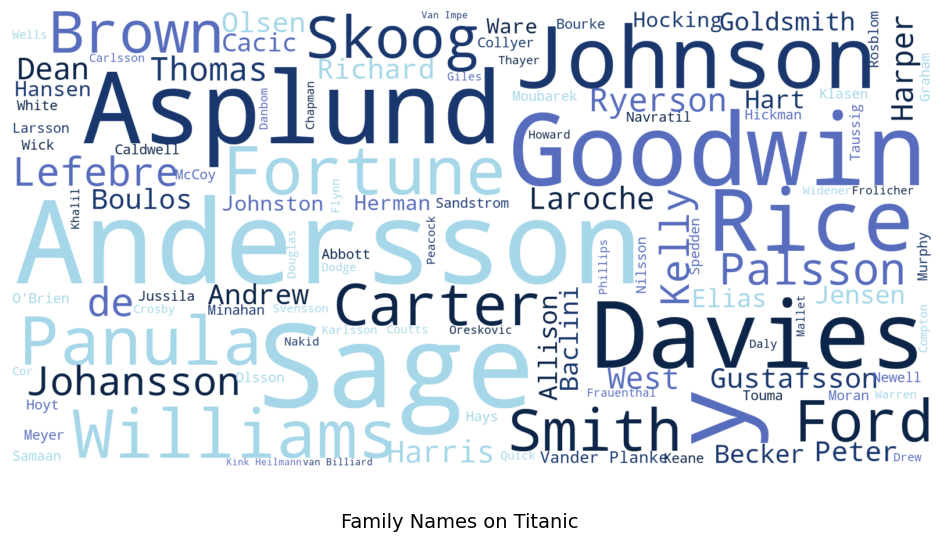

In [75]:
show_wordcloud(all_df["Family Name"], title="Family Names on Titanic")

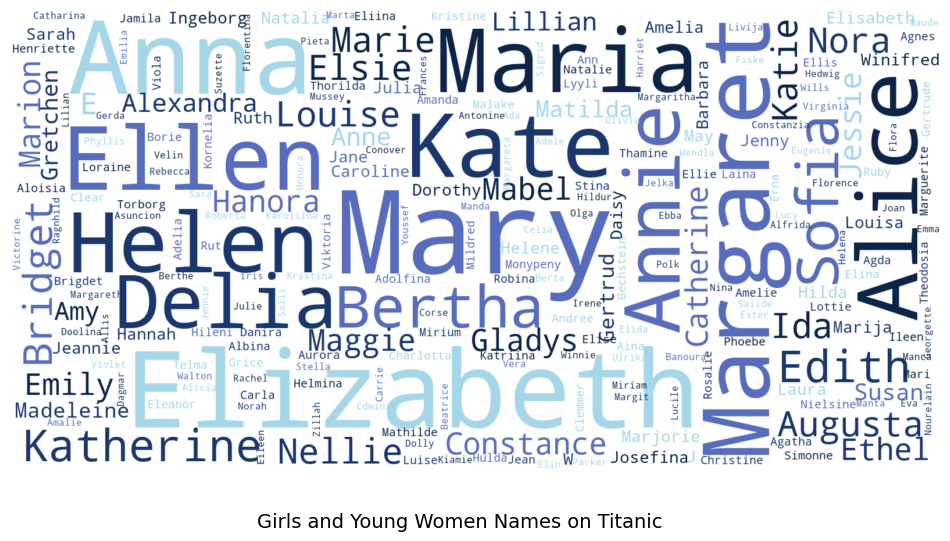

In [76]:
show_wordcloud(all_df.loc[all_df["Title"].isin(["Miss.", "Mlle."])]["Given Name"], title="Girls and Young Women Names on Titanic")

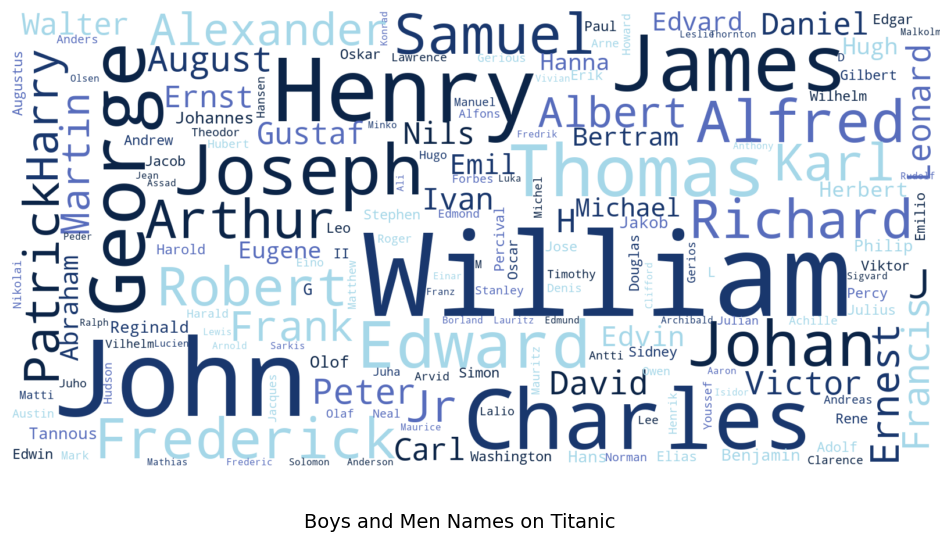

In [77]:
show_wordcloud(all_df.loc[all_df["Sex"]=="male"]["Given Name"], title="Boys and Men Names on Titanic")

In [78]:
all_df["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

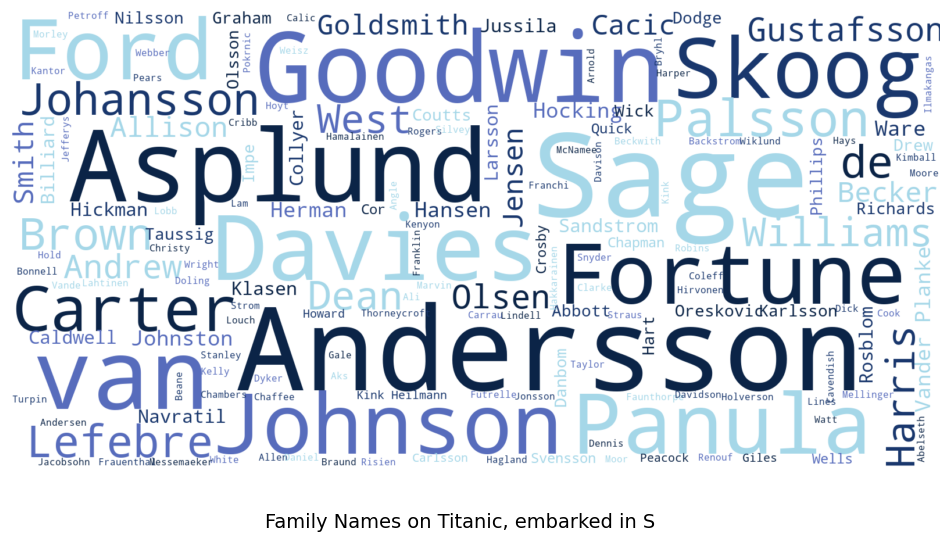

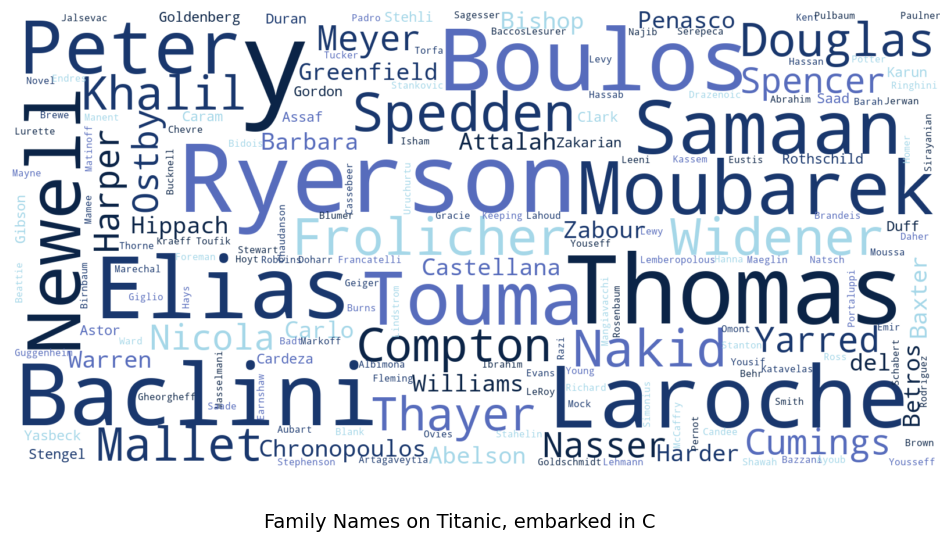

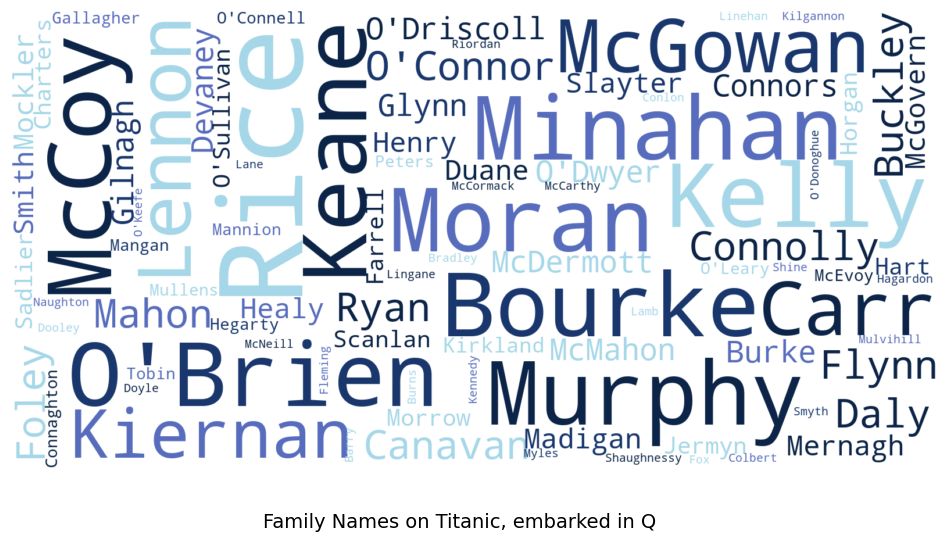

In [79]:
for embark in all_df["Embarked"].unique():
    try:
        show_wordcloud(all_df.loc[all_df["Embarked"]==embark]["Family Name"], title=f"Family Names on Titanic, embarked in {embark}")
    except:
        pass

## Multivariate analysis


Let's look now to the interaction of multiple features.

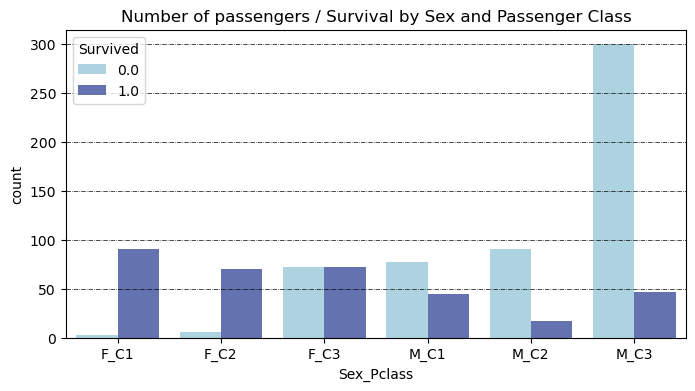

In [80]:
plot_count_pairs(all_df.sort_values(by=("Sex_Pclass")), "Sex_Pclass", "Survival by Sex and Passenger Class", "Survived")

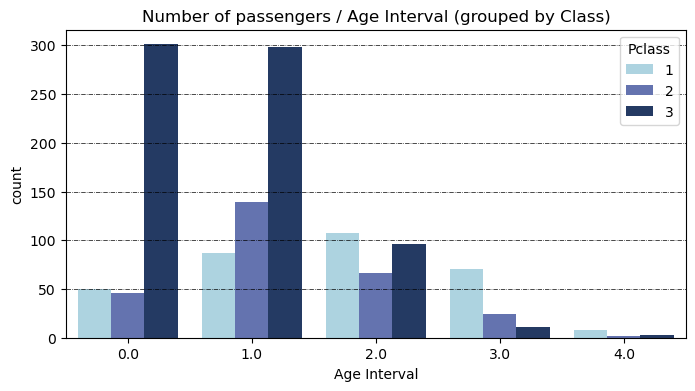

In [81]:
plot_count_pairs(all_df, "Age Interval", "Age Interval (grouped by Class)", "Pclass")

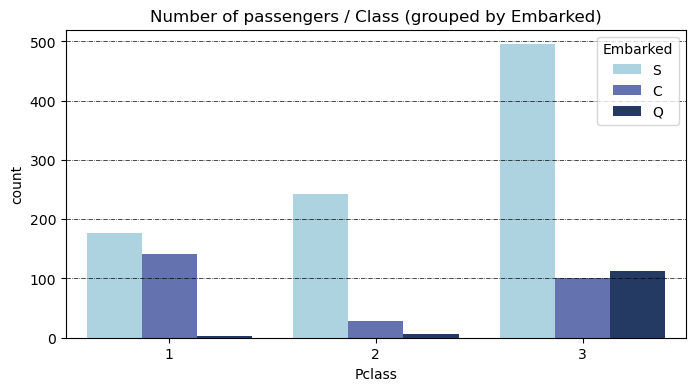

In [82]:
plot_count_pairs(all_df, "Pclass", "Class (grouped by Embarked)", "Embarked")

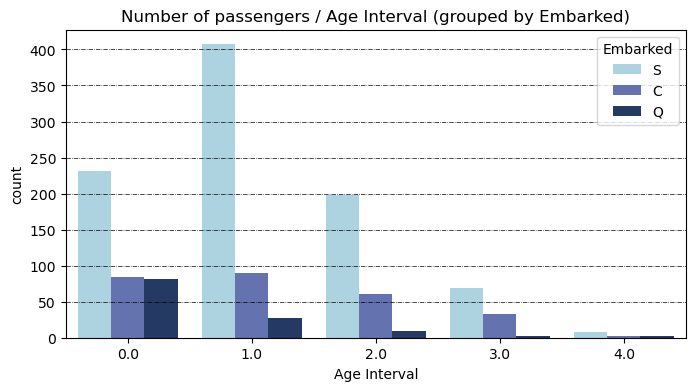

In [83]:
plot_count_pairs(all_df, "Age Interval", "Age Interval (grouped by Embarked)", "Embarked")

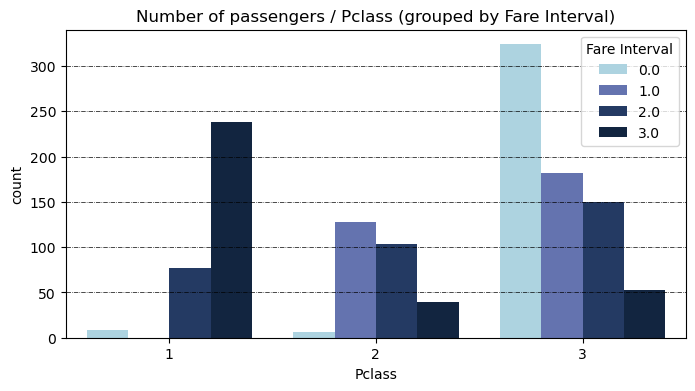

In [84]:
plot_count_pairs(all_df, "Pclass", "Pclass (grouped by Fare Interval)", "Fare Interval")

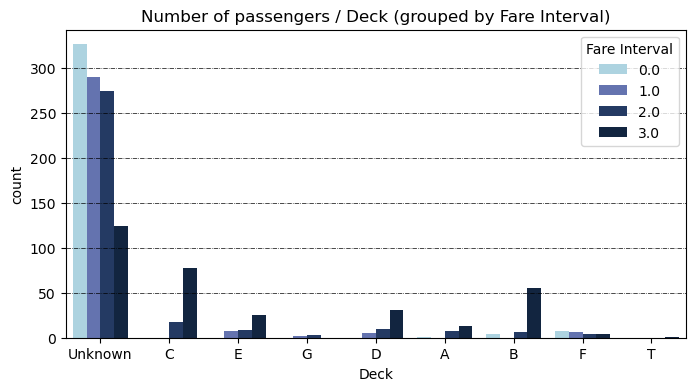

In [85]:
plot_count_pairs(all_df, "Deck", "Deck (grouped by Fare Interval)", "Fare Interval")

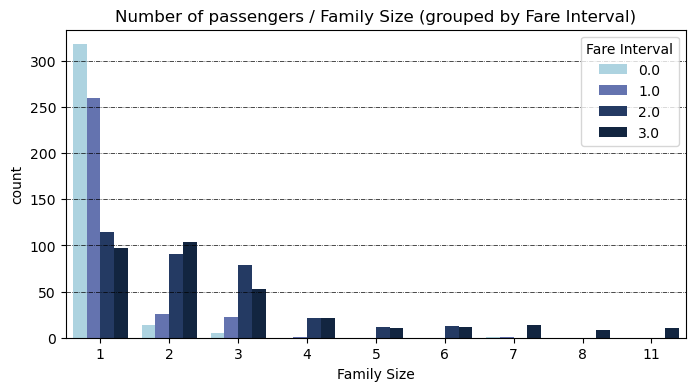

In [86]:
plot_count_pairs(all_df, "Family Size", "Family Size (grouped by Fare Interval)", "Fare Interval")

In [87]:
def plot_count_distrib_pairs(data_df, f_one, f_two, title, hue="Survived"):
    sns.set_style("whitegrid", {'axes.grid' : True})
    fig = plt.figure(figsize=(6,6))
    ax = fig.add_subplot(111, projection='3d')
    sns.kdeplot(x=data_df[f_one], y=data_df[f_two], hue=data_df[hue], palette=color_list)
    ax.set_zlabel('Density')
    ax.set_title(title)
    plt.show()    

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  """


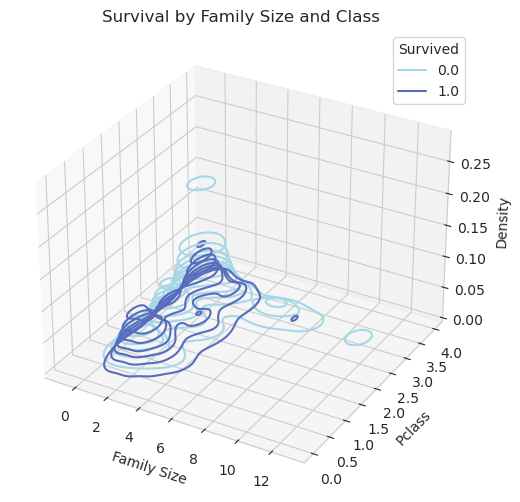

In [88]:
plot_count_distrib_pairs(all_df, "Family Size", "Pclass", "Survival by Family Size and Class")

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  """


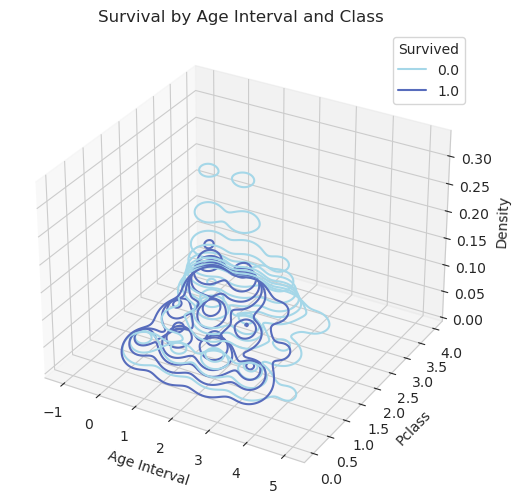

In [89]:
plot_count_distrib_pairs(all_df, "Age Interval", "Pclass", "Survival by Age Interval and Class")

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  """Entry point for launching an IPython kernel.


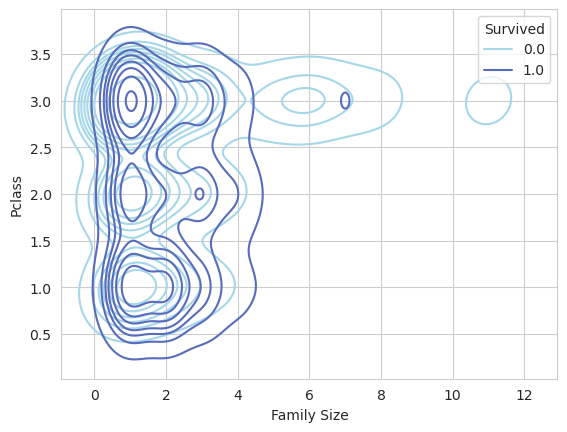

In [90]:
sns.kdeplot(x=all_df["Family Size"], y=all_df["Pclass"], hue=all_df["Survived"], palette= color_list[0:3])
plt.show()

### Few more engineered data 


Let's create two more engineered features:  
* Family size interval: Single, Small, Large  
* Aggregated titles: Mr, Mrs, Master, Miss, and Rare  

In [91]:
for dataset in [all_df, train_df]:
    dataset["Family Type"] = dataset["Family Size"]

In [92]:
for dataset in [all_df, train_df]:
    dataset.loc[dataset["Family Size"] == 1, "Family Type"] = "Single"
    dataset.loc[(dataset["Family Size"] > 1) & (dataset["Family Size"] < 5), "Family Type"] = "Small"
    dataset.loc[(dataset["Family Size"] >= 5), "Family Type"] = "Large"

In [93]:
for dataset in [all_df, train_df]:
    dataset["Titles"] = dataset["Title"]

In [94]:

for dataset in [all_df, train_df]:
    #unify `Miss`
    dataset['Titles'] = dataset['Titles'].replace('Mlle.', 'Miss.')
    dataset['Titles'] = dataset['Titles'].replace('Ms.', 'Miss.')
    #unify `Mrs`
    dataset['Titles'] = dataset['Titles'].replace('Mme.', 'Mrs.')
    # unify Rare
    dataset['Titles'] = dataset['Titles'].replace(['Lady.', 'the Countess.','Capt.', 'Col.',\
     'Don.', 'Dr.', 'Major.', 'Rev.', 'Sir.', 'Jonkheer.', 'Dona.'], 'Rare')

In [95]:
train_df[['Titles', 'Sex', 'Survived']].groupby(['Titles', 'Sex'], as_index=False).mean()

Titles     Sex  Survived
0  Master.    male  0.575000
1    Miss.  female  0.702703
2      Mr.    male  0.156673
3     Mrs.  female  0.793651
4     Rare  female  1.000000
5     Rare    male  0.250000

## Complex analysis in one graph

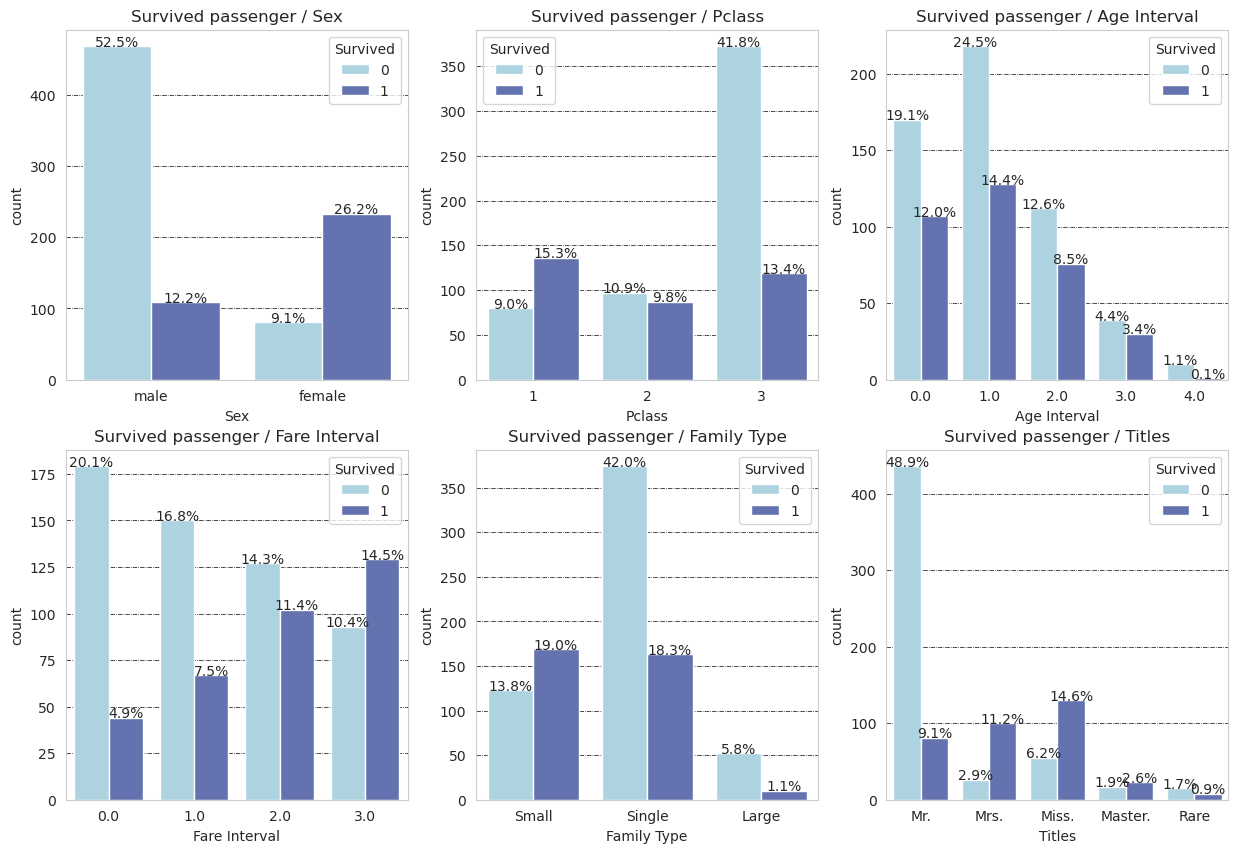

In [96]:
f, ax = plt.subplots(2, 3, figsize=(15, 10))

features = ["Sex", "Pclass", "Age Interval", "Fare Interval", "Family Type", "Titles"]

for i, feature in enumerate(features):
    crt_ax = (int(i/3), i%3)
    total = float(len(train_df))
    sns.countplot(x=feature, data=train_df, hue="Survived", palette= color_list, ax = ax[crt_ax])
    ax[crt_ax].grid(color="black", linestyle="-.", linewidth=0.5, axis="y", which="major")
    ax[crt_ax].set_title(f"Survived passenger / {feature}")
    for p in ax[crt_ax].patches:
        height = p.get_height()
        ax[crt_ax].text(p.get_x()+p.get_width()/2.,
                height,
                '{:1.1f}%'.format(100*height/total),
                ha="center", fontsize=10) 


plt.show()    



# Baseline model

In [97]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier

## Map categorical value to numerical values

In [98]:
for dataset in [train_df, test_df]:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

Create train-validation split.

In [99]:
VALID_SIZE = 0.2
train, valid = train_test_split(train_df, test_size=VALID_SIZE, random_state=42, shuffle=True)

Define predictor features and target feature.

In [100]:
predictors = ["Sex", "Pclass"]
target = 'Survived'

Define the training and validation data and labels.

In [101]:
train_X = train[predictors]
train_Y = train[target].values
valid_X = valid[predictors]
valid_Y = valid[target].values

Initialize the classifiction algorithm.

In [102]:
clf = RandomForestClassifier(n_jobs=-1, 
                             random_state=42,
                             criterion="gini",
                             n_estimators=100,
                             verbose=False)

Fit the classifier with the training data.

In [103]:
clf.fit(train_X, train_Y)

RandomForestClassifier(n_jobs=-1, random_state=42, verbose=False)

Predict the train data (to check the training classification error).

In [104]:
preds_tr = clf.predict(train_X)

Predict the validation data.

In [105]:
preds = clf.predict(valid_X)

Classification report for training data.

In [106]:
print(metrics.classification_report(train_Y, preds_tr, target_names=['Not Survived', 'Survived']))

              precision    recall  f1-score   support

Not Survived       0.75      0.99      0.86       444
    Survived       0.96      0.47      0.63       268

    accuracy                           0.79       712
   macro avg       0.86      0.73      0.74       712
weighted avg       0.83      0.79      0.77       712



Classification report for validation data.

In [107]:
print(metrics.classification_report(valid_Y, preds, target_names=['Not Survived', 'Survived']))

              precision    recall  f1-score   support

Not Survived       0.73      0.96      0.83       105
    Survived       0.90      0.49      0.63        74

    accuracy                           0.77       179
   macro avg       0.81      0.72      0.73       179
weighted avg       0.80      0.77      0.75       179

